In [272]:
import numpy as np
import matplotlib.pyplot as plt

In [273]:
# Load the data from MNIST-5-6-Subset.txt
# Change the path as needed
data_file_path = "MNIST-5-6-Subset/MNIST-5-6-Subset.txt"
data_matrix = np.loadtxt(data_file_path).reshape(1877, 784)
# Load the labels from MNIST-5-6-Labels.txt
# Change the path as needed
labels_file_path = "MNIST-5-6-Subset/MNIST-5-6-Subset-Labels.txt"
labels = np.loadtxt(labels_file_path)


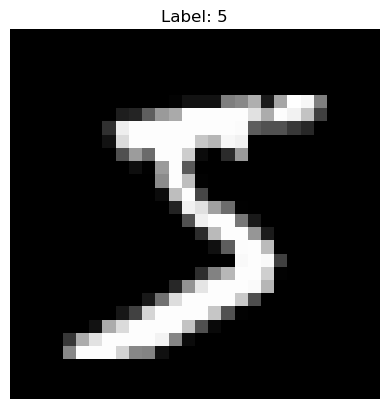

In [274]:
# Assuming you want to visualize the first image
# Change the index as needed
image_index = 0
image_data = data_matrix[image_index]
selected_label = int(labels[image_index])
# Visualize the image using Matplotlib
# We transpose the image to make the number look upright.
plt.imshow(image_data.reshape(28,28).transpose(1,0), cmap='gray')
plt.title(f"Label: {selected_label}")
plt.axis('off') # Turn off axis
plt.show()

In [275]:
X_train, Y_train = data_matrix[:50], labels[:50]
X_test, Y_test = data_matrix[101], labels[101]

In [276]:
'''
    Inputs: 
        training_points: d x m matrix 
            m - training points
            d - Dimmensions (28x28=784)
        training_labels - Corresponding m labels
        test_points: d x m matrix 
            m - training points
            d - Dimmensions (28x28=784)
        test_labels - Corresponding m labels
    Returns:
        A binary vector of lenght m
'''
def knn(training_points, training_labels, test_point, test_label):
    # Convert labels
    training_labels[training_labels == 5] = -1
    training_labels[training_labels == 6] = 1
    if test_label == 5: test_label = -1  
    else: test_label = 1
    
    # Calculate all distances
    dist = np.linalg.norm(test_point - training_points, axis=1)
    distSort = np.argsort(dist)
    res = list(map(lambda x: training_labels[x], distSort)) #From index to label
    
    # Cummalitive sum of list: If elm>0 then True, else False
    sum = np.cumsum(res)
    # Guesses
    sum[sum > 0] = 1
    sum[sum <= 0] = -1
    # Check if guess is correct
    error = np.where(sum == test_label, 0, 1)
    
    
    return error

knn(X_train, Y_train, X_test, Y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [277]:
'''
    Input:
        data
        i - Number of the validaton set
        n - Size of validation set
        m - Size of training data

    return:
        validationset
'''
def splitVal(data, i, n, m): 
    return data[(m + (i * n) + 1 ) : ((m + ((i + 1)) * n) + 1)]



In [278]:
def plotValError(m, valError, valSet):
    # Dummy data, x and y
    x = np.arange(m)
    y = valError
    some_parameter = valSet
    # Initialise figure (fig) and axis (ax)
    fig, ax = plt.subplots(figsize=(8,5))
    # Plot in axis, add label to data
    ax.plot(x, y, label='Validation error') # (*)
    # Set labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(f'{some_parameter}')
    # Add grid
    ax.grid(alpha=0.2)
    # Set axes limits
    ax.set_ylim(0,5)
    # Add legend (remember to label the data as shown above (*))
    ax.legend()
    # Show plot
    plt.show()
    # Save plot to some local path
    fig.savefig('validation_err.png')

---------------------


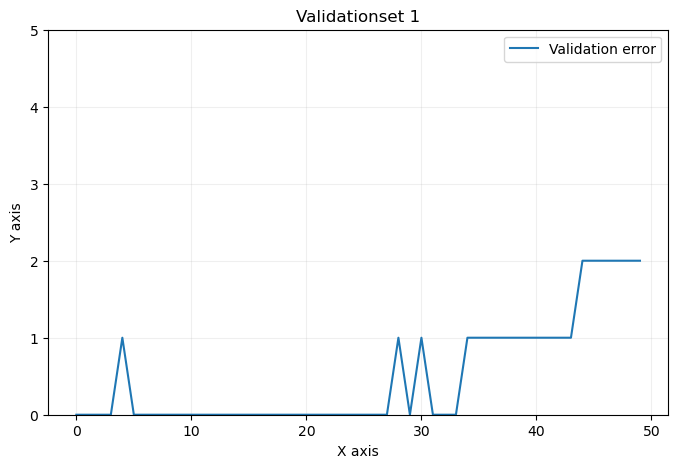

---------------------


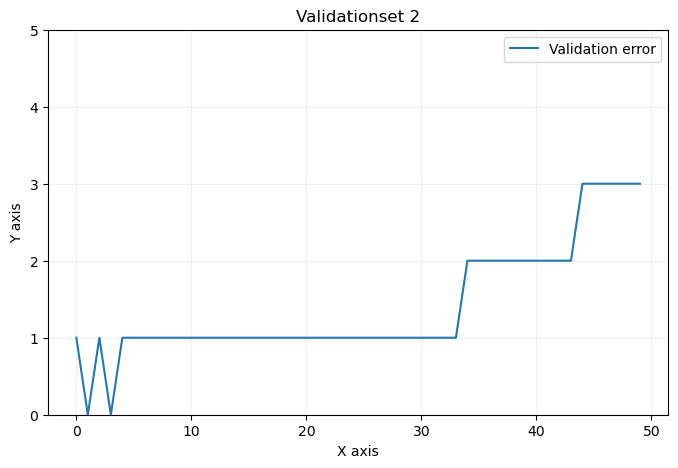

---------------------


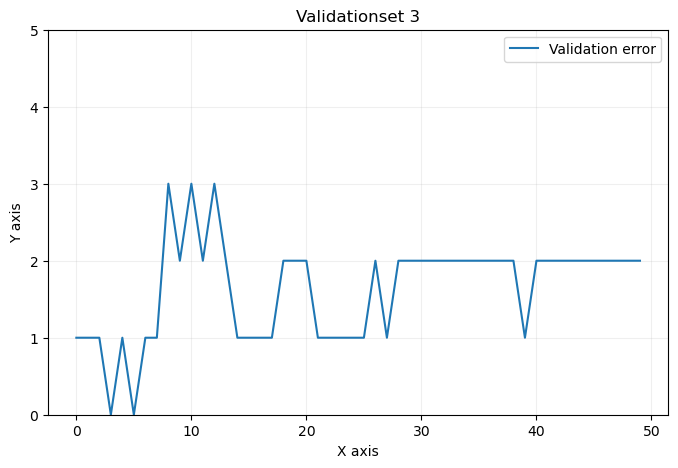

---------------------


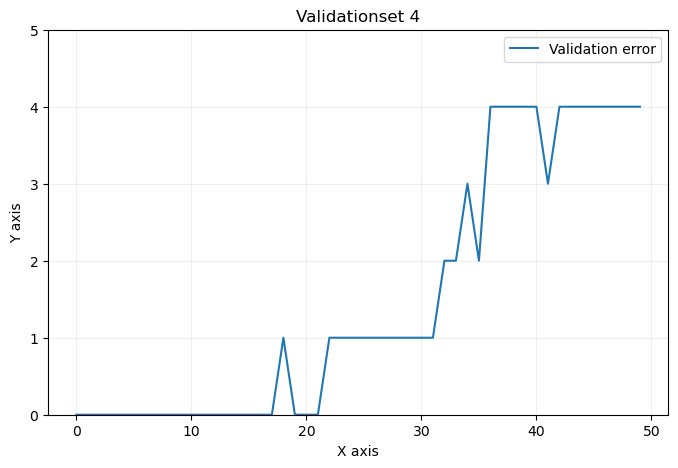

---------------------


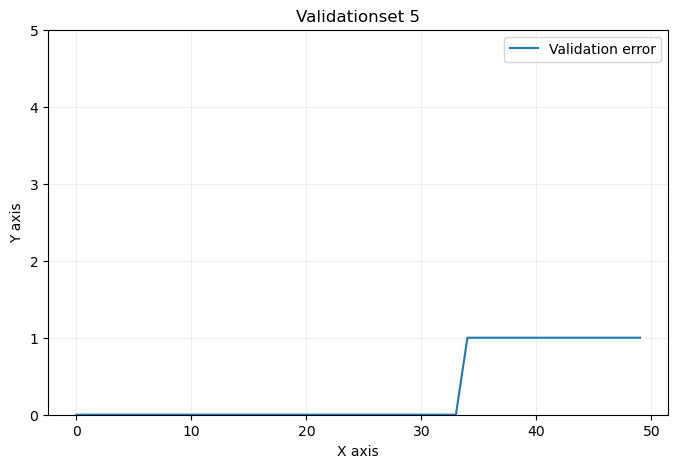

In [279]:
m = 50
n = 5

for i in range (5):
    print('---------------------')
    X_val = splitVal(data_matrix, i, n, m)
    Y_val = splitVal(labels, i, n, m)
    sumLst = np.zeros(m)
    for x in range (len(X_val)):
        something = knn(X_train, Y_train, X_val[x], Y_val[x])
        sumLst = sumLst + something
    valName = 'Validationset ' + str(i+1)
    plotValError(m, sumLst, valName)
        